In [1]:
import pandas as pd
import pulp
import matplotlib.pyplot as plt

**Problem 1**

In [2]:
# A company manufactures and sells two models of lamps, L1 and L2. 
# To manufacture each lamp, the manual work involved in model L1 is 20 minutes and for L2, 30 minutes.
# The mechanical (machine) work involved for L1 is 20 minutes and for L2, 10 minutes. 
# The manual work available per month is 100 hours and the machine is limited to only 80 hours per month. 
# Knowing that the profit per unit is 15 and 10 for L1 and L2, respectively, 
# determine the quantities of each lamp that should be manufactured to obtain the maximum benefit.

In [3]:
prob1 = pulp.LpProblem('lamps', pulp.LpMaximize)

#Decision variables
L1 = pulp.LpVariable('L1', lowBound=0, cat='Integer')
L2 = pulp.LpVariable('L2', lowBound=0, cat='Integer')

#Objective function
prob1 += (L1 * 15) + (L2 * 10), 'Profit'

#Constraints
prob1 += (1/3 * L1) + (1/2 * L2) <= 100
prob1 += (1/3 * L1) + (1/6 * L2) <= 80

prob1.solve()
pulp.LpStatus[prob1.status]

'Optimal'

In [4]:
print(f"Production of Lamp 1 = {L1.varValue}")
print(f"Production of Lamp 2 = {L2.varValue}")

Production of Lamp 1 = 210.0
Production of Lamp 2 = 60.0


In [5]:
print(f"${pulp.value(prob1.objective)}")

$3750.0


**Problem 2**

In [6]:
# With the start of school approaching, a store is planning on having a sale on school materials. 
# They have 600 notebooks, 500 folders and 400 pens in stock, and they plan on packing it in two different forms. 
# In the first package, there will be 2 notebooks, 1 folder and 2 pens, and in the second one, 3 notebooks, 1 folder and 1 pen. 
# The price of each package will be 6.50 and 7.00 respectively. 
# How many packages should they put together of each type to obtain the maximum benefit?

In [8]:
prob2 = pulp.LpProblem('back_to_school', pulp.LpMaximize)

#Decision variables
P1 = pulp.LpVariable('P1', lowBound=0, cat='Integer')
P2 = pulp.LpVariable('P2', lowBound=0, cat='Integer')

#Objective function
prob2 += (P1 * 6.5) + (P2 * 7), 'Profit'

#Stock constraints
prob2 += (P1*2) + (P2*3) <= 600, 'notebook_constraint'
prob2 += P1 + P2 <= 500, 'folder_constraint'
prob2 += (P1*2) + P2 <= 400, 'pen_constraint'

prob2.solve()
pulp.LpStatus[prob2.status]

'Optimal'

In [9]:
print(f"Production of Package 1 = {P1.varValue}")
print(f"Production of Package 2 = {P2.varValue}")

Production of Package 1 = 150.0
Production of Package 2 = 100.0


In [10]:
print(f"Total Profit: ${pulp.value(prob2.objective)}")

Total Profit: $1675.0


**Problem 3**

In [11]:
# A coffee packer blends Brazilian coffee and Colombian coffee to prepare two products, 
# super and deluxe brands. Each kilogram of super coffee contains 0.5 kg of Brazilian coffee and 0.5 kg of Colombian coffee,
# whereas each kilogram of deluxe coffee contains 0.25 kg of Brazilian coffee and 0.75 kg of Colombian coffee. 
# The packer has 120kg of Brazilian coffee and 160kg of Colombian coffee on hand. If the profit one each kilogram of
# super coffee is 22 cents and the profit on each kilogram of Deluxe coffee is 30 cents, 
# how many kilograms of each type of coffee should be blended to maximise profits? Formulate and solve.

In [12]:
prob3 = pulp.LpProblem('bean_juice', pulp.LpMaximize)

#Decision variables
super = pulp.LpVariable('super', lowBound=0, cat='Integer')
deluxe = pulp.LpVariable('deluxe', lowBound=0, cat='Integer')

#Objective function
prob3 += (super * 0.22) + (deluxe * 0.3), 'Profit'

#Constraints
prob3 += (super * 0.5) + (deluxe * 0.25) <= 120
prob3 += (super * 0.5) + (deluxe * 0.75) <= 160

prob3.solve()
pulp.LpStatus[prob3.status]

'Optimal'

In [13]:
print(f"Production of Super = {super.varValue}")
print(f"Production of Deluxe = {deluxe.varValue}")

Production of Super = 200.0
Production of Deluxe = 80.0


In [14]:
print(f"Total Profit: ${pulp.value(prob3.objective)}")

Total Profit: $68.0


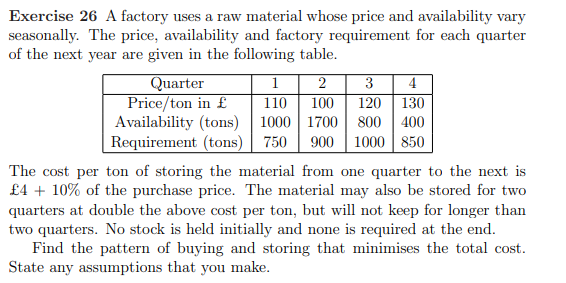

In [28]:
prob4 = pulp.LpProblem('tons_of_tons', pulp.LpMinimize)

# Decision variables for quantities bought
Q1 = pulp.LpVariable('Q1_Availability', lowBound=0, upBound=1000, cat='Integer')
Q2 = pulp.LpVariable('Q2_Availability', lowBound=0, upBound=1700, cat='Integer')
Q3 = pulp.LpVariable('Q3_Availability', lowBound=0, upBound=800, cat='Integer')
Q4 = pulp.LpVariable('Q4_Availability', lowBound=0, upBound=400, cat='Integer')

# Decision variables for quantities stored
S1 = pulp.LpVariable('S1_Storage', lowBound=0, cat='Integer')
S2 = pulp.LpVariable('S2_Storage', lowBound=0, cat='Integer')
S3 = pulp.LpVariable('S3_Storage', lowBound=0, cat='Integer')

# Objective function 
prob4 += (
    (Q1 * 110) + (S12 * (110 * 0.1 + 4)) + 
    (Q2 * 100) + (S23 * (100 * 0.1 + 4)) + 
    (Q3 * 120) + (S34 * (120 * 0.1 + 4)) + 
    (Q4 * 130)
), 'Cost'

#Constraints
prob4 += Q1 >= 750
prob4 += S12 == Q1 - 750
prob4 += Q2 + S12 >= 900
prob4 += S23 == Q2 + S12 - 900
prob4 += Q3 + S23 >= 1000
prob4 += S34 == Q3 + S23 - 1000
prob4 += Q4 + S34 >= 850

prob4.solve()
pulp.LpStatus[prob3.status]

'Optimal'

In [29]:
print(f"Production of Q1 = {Q1.varValue}")
print(f"Production of Q2 = {Q2.varValue}")
print(f"Production of Q3 = {Q3.varValue}")
print(f"Production of Q4 = {Q4.varValue}")

Production of Q1 = 750.0
Production of Q2 = 1700.0
Production of Q3 = 650.0
Production of Q4 = 400.0


In [30]:
print(f"Total Cost: ${pulp.value(prob4.objective)}")

Total Cost: $400900.0
